In [1]:
import numpy as np
from skimage.draw import circle_perimeter_aa
import json
import matplotlib.pyplot as plt
from glob import glob

In [2]:
def draw_circle(radius, x, y):
    """
    Function to generate an anti-aliased circle and draw it into
    a sect of pixels
    """
    rr, cc, value = circle_perimeter_aa(x, y, radius)
    is_valid = np.logical_and(np.logical_and(rr >= 0, rr < 256), np.logical_and(cc >= 0, cc < 256))
    img = np.zeros((256, 256))
    img[rr[is_valid], cc[is_valid]] = 2*value[is_valid]
    return img

def generate_circle(noise_level=2, rad_min=3, rad_max=20):
    """
    Function to generate an image with a circle obscured by some noise.
    Core function for generating the images you need to run your model against.
    DO NOT CHANGE.

    For training a model X = img, Y = labels (you will need more than one component in 
    your prediction output (row, col, radius))
    """
    row = np.random.randint(0, 256)
    col = np.random.randint(0, 256)
    radius = np.random.randint(rad_min, rad_max)
    img = draw_circle(radius, row, col)
    img += noise_level * np.random.rand(256, 256)
    label = {'row': row, 'col': col, 'radius': radius, 'noise_level': noise_level}
    return img, label

def generate_circle_dataset(path, avg_noise=2, n=10):
    """
    Helper function to show how you can pre-save a bunch of circle images with
    their associated label information for the purposes of your data. 
    """
    for idx in range(n):
        img, label = generate_circle(np.max([0, np.random.normal(avg_noise, avg_noise/2.0)]))
        with open(f'{path}/file{idx}.json', 'w') as f:
            json.dump({'img': img.tolist(), 'label': label}, f)
    
def load_dataset_and_plot(path, n_to_show=10):
    """
    Provided as a demo for how to load a dataset you've generated and get the img
    and configuration data from your dataset. This is not necessary to use for the
    takehome assignment and is simply here to give you some help getting started 
    if needed.
    """
    idx=0
    for file in glob(f'{path}/*.json'):
        with open(file,'r') as f:
            example_data = json.load(f)
            print(file)
            print(example_data['label'])
            img = np.array(example_data['img'])
            plt.imshow(img)
            plt.show()
            idx+=1
        if idx >= n_to_show:
            break

In [8]:
# produce dataset
data_path = 'data/'
generate_circle_dataset(data_path, n=100)

data/file9.json
{'row': 175, 'col': 163, 'radius': 5, 'noise_level': 1.8657574969565667}


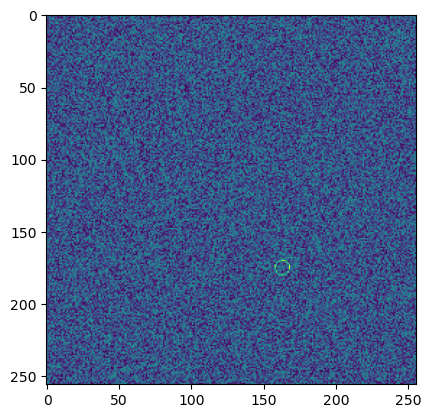

data/file5.json
{'row': 148, 'col': 134, 'radius': 10, 'noise_level': 1.7260715609012771}


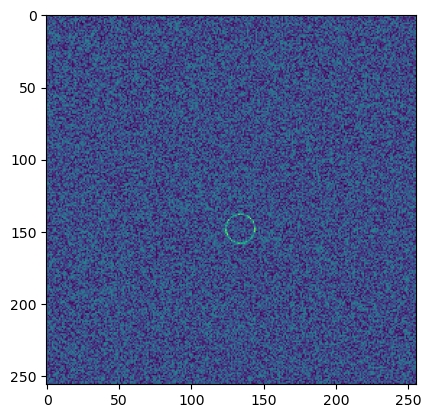

data/file4.json
{'row': 12, 'col': 93, 'radius': 6, 'noise_level': 3.2363827775921346}


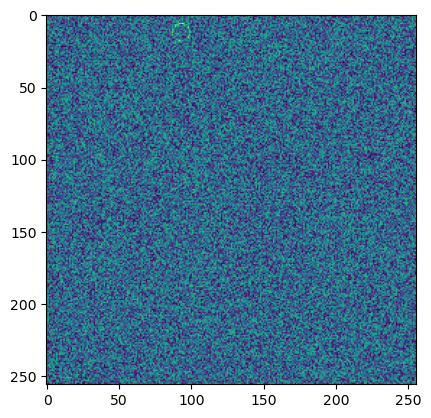

data/file8.json
{'row': 52, 'col': 250, 'radius': 10, 'noise_level': 2.8056565536885842}


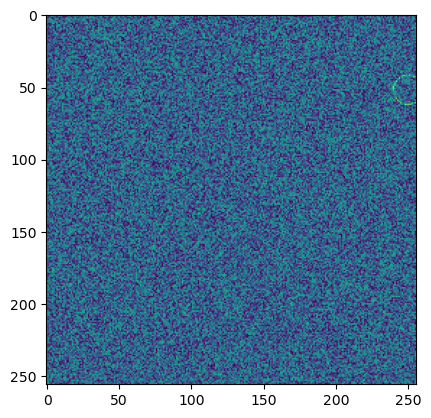

data/file3.json
{'row': 27, 'col': 76, 'radius': 5, 'noise_level': 3.404127390117811}


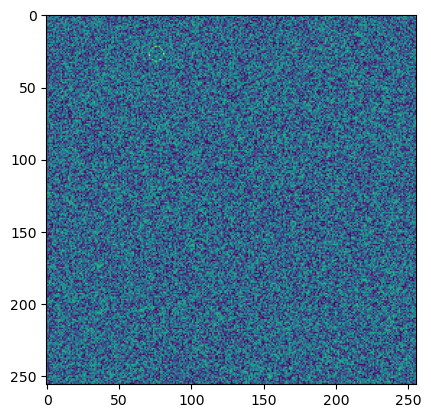

data/file2.json
{'row': 47, 'col': 209, 'radius': 7, 'noise_level': 0.0}


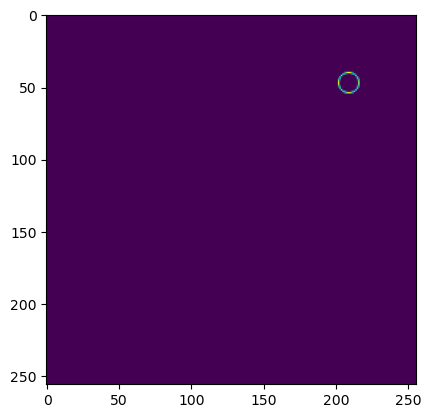

data/file1.json
{'row': 36, 'col': 64, 'radius': 14, 'noise_level': 1.197201374864951}


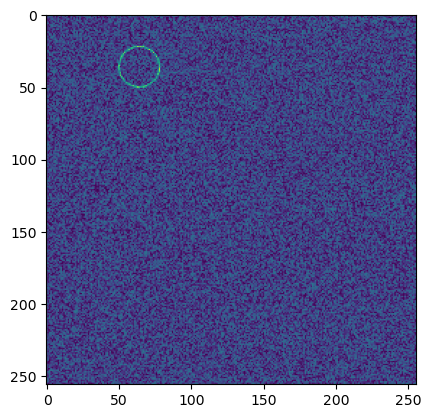

data/file0.json
{'row': 34, 'col': 124, 'radius': 17, 'noise_level': 2.212971695250702}


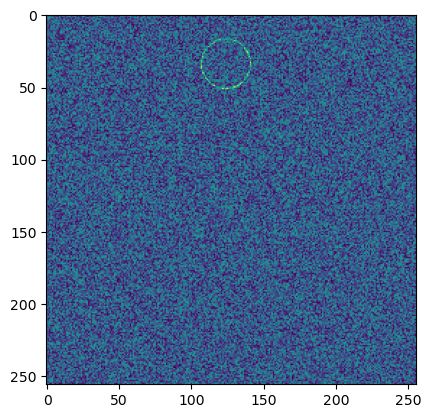

data/file7.json
{'row': 187, 'col': 230, 'radius': 11, 'noise_level': 2.1311372807608486}


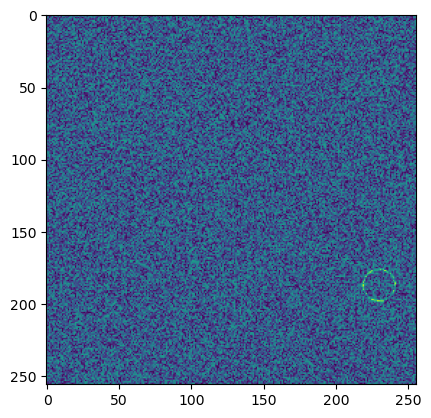

data/file6.json
{'row': 111, 'col': 255, 'radius': 6, 'noise_level': 1.1558931592134907}


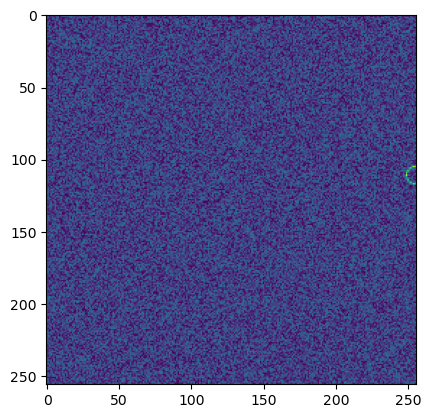

In [7]:
load_dataset_and_plot(data_path, n_to_show=10)